# Age correlation analysis

In [182]:
import sys
# To import python scripts from other folders
sys.path.append('../')
import json
from ProjectAnalysis import ProjectAnalysis
import os
from os import listdir
from os.path import isfile, join
from collections import Counter
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt 
import time
from datetime import datetime, timezone
from dateutil.parser import parse

In [192]:
experiment="GitHub"
def get_projects_resume():
    isFailList = []
    days = []
    buildSystems = []
    for project_name in [p for p in os.listdir(results_path) if os.path.isdir(results_path+p)]:
        report = pd.read_csv("/home/results/{exp}/{project}/experiment_1/report_experiment_1.csv".format(
            exp=experiment,root=root, project=project_name))
        results = pd.read_csv("/home/notebooks/ProjectAnalysis/GitHubProyectsAnalysis/results/%s.csv"%project_name)
        delta_days = []
        projectBuildSystemsPerCommit = []
        
        for index, row in report.iterrows():
            now = datetime(2021, 10, 1, tzinfo=timezone.utc)
            original = parse(row['date']).replace(tzinfo=timezone.utc)
            delta = now-original
            delta_days.append(delta.days)
            
        isFailList = isFailList + list(map(lambda x: 1 if x == 'FAIL' else 0, report['build'].tolist()))
        days = days + delta_days
        buildSystems = buildSystems + list(results["BUILD_SYSTEM"])
    data = {
        'isFail': isFailList,
        'n_days': days,
        'buildSystem': buildSystems
    }
    df = pd.DataFrame(data)
    return df

In [193]:
df = get_projects_resume()

### Check basic corr

In [194]:
df.corr(method ='pearson')

,isFail,n_days
isFail,1.000000,0.114251
n_days,0.114251,1.000000


In [195]:
df[df['buildSystem']=='Ant'].corr(method ='pearson')

,isFail,n_days
isFail,1.000000,-0.178282
n_days,-0.178282,1.000000


In [196]:
df[df['buildSystem']=='Maven'].corr(method ='pearson')

,isFail,n_days
isFail,1.000000,0.072028
n_days,0.072028,1.000000


In [197]:
df[df['buildSystem']=='Gradle'].corr(method ='pearson')

,isFail,n_days
isFail,1.000000,0.172172
n_days,0.172172,1.000000


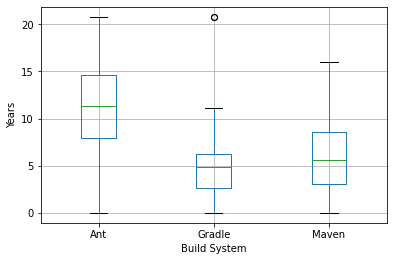

In [201]:
df_years = df.copy()
df_years['years'] = df_years['n_days'].apply(lambda x: x/365)
df_years[df_years['buildSystem']!='NOT_FOUND'].boxplot(column=['years'], by='buildSystem')
plt.title('')
plt.suptitle('')
plt.ylabel('Years')
plt.xlabel('Build System')
plt.savefig('AgePerBuildSystem.pdf')
plt.show()


In [200]:
df_years.sort_values('n_days', ascending=False)

,isFail,n_days,buildSystem,years
9049,1,9038,NOT_FOUND,24.761644
9050,1,8388,NOT_FOUND,22.980822
9051,1,8381,NOT_FOUND,22.961644
9052,1,8380,NOT_FOUND,22.958904
9053,1,8377,NOT_FOUND,22.950685
...,...,...,...,...
218977,1,1,Gradle,0.002740
60311,1,0,Maven,0.000000
100443,1,0,Maven,0.000000
96957,0,0,Maven,0.000000
